In [118]:
import pandas as pd
import numpy as np
import os
import sys

In [119]:
train_df = pd.read_csv(r'/home/litzchill/vamshi/Podcast_listen_time/dataset/train.csv')

In [120]:
train_df.head()

,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes
0,0,Mystery Matters,Episode 98,NaN,True Crime,74.81,Thursday,Night,NaN,0.0,Positive,31.41998
1,1,Joke Junction,Episode 26,119.80,Comedy,66.95,Saturday,Afternoon,75.95,2.0,Negative,88.01241
2,2,Study Sessions,Episode 16,73.90,Education,69.97,Tuesday,Evening,8.97,0.0,Negative,44.92531
3,3,Digital Digest,Episode 45,67.17,Technology,57.22,Monday,Morning,78.70,2.0,Positive,46.27824
4,4,Mind & Body,Episode 86,110.51,Health,80.07,Monday,Afternoon,58.68,3.0,Neutral,75.61031


In [121]:
train_df.shape

(750000, 12)

# Checking missing values

In [122]:
train_df.isna().sum()

id                                  0
Podcast_Name                        0
Episode_Title                       0
Episode_Length_minutes          87093
Genre                               0
Host_Popularity_percentage          0
Publication_Day                     0
Publication_Time                    0
Guest_Popularity_percentage    146030
Number_of_Ads                       1
Episode_Sentiment                   0
Listening_Time_minutes              0
dtype: int64

#### There are missing values in the dataset lets handle them 


In [123]:

train_df=pd.DataFrame(train_df)

In [124]:
train_df.columns

Index(['id', 'Podcast_Name', 'Episode_Title', 'Episode_Length_minutes',
       'Genre', 'Host_Popularity_percentage', 'Publication_Day',
       'Publication_Time', 'Guest_Popularity_percentage', 'Number_of_Ads',
       'Episode_Sentiment', 'Listening_Time_minutes'],
      dtype='object')

In [125]:
train_df.isnull().sum()

id                                  0
Podcast_Name                        0
Episode_Title                       0
Episode_Length_minutes          87093
Genre                               0
Host_Popularity_percentage          0
Publication_Day                     0
Publication_Time                    0
Guest_Popularity_percentage    146030
Number_of_Ads                       1
Episode_Sentiment                   0
Listening_Time_minutes              0
dtype: int64

In [126]:
train_df['Episode_Length_minutes'] = train_df['Episode_Length_minutes'].fillna(train_df['Episode_Length_minutes'].median())
train_df['Guest_Popularity_percentage'] = train_df['Guest_Popularity_percentage'].fillna(train_df['Guest_Popularity_percentage'].median())
train_df['Number_of_Ads'] = train_df['Number_of_Ads'].fillna(train_df['Number_of_Ads'].median())

In [127]:
train_df.isnull().sum()

id                             0
Podcast_Name                   0
Episode_Title                  0
Episode_Length_minutes         0
Genre                          0
Host_Popularity_percentage     0
Publication_Day                0
Publication_Time               0
Guest_Popularity_percentage    0
Number_of_Ads                  0
Episode_Sentiment              0
Listening_Time_minutes         0
dtype: int64

## check for duplicates

In [128]:
train_df.duplicated().sum()

np.int64(0)

In [129]:
# Check Null and Dtypes
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 12 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           750000 non-null  int64  
 1   Podcast_Name                 750000 non-null  object 
 2   Episode_Title                750000 non-null  object 
 3   Episode_Length_minutes       750000 non-null  float64
 4   Genre                        750000 non-null  object 
 5   Host_Popularity_percentage   750000 non-null  float64
 6   Publication_Day              750000 non-null  object 
 7   Publication_Time             750000 non-null  object 
 8   Guest_Popularity_percentage  750000 non-null  float64
 9   Number_of_Ads                750000 non-null  float64
 10  Episode_Sentiment            750000 non-null  object 
 11  Listening_Time_minutes       750000 non-null  float64
dtypes: float64(5), int64(1), object(6)
memory usage: 68.7+ MB


In [130]:
train_df.nunique()

id                             750000
Podcast_Name                       48
Episode_Title                     100
Episode_Length_minutes          12268
Genre                              10
Host_Popularity_percentage       8038
Publication_Day                     7
Publication_Time                    4
Guest_Popularity_percentage     10019
Number_of_Ads                      12
Episode_Sentiment                   3
Listening_Time_minutes          42807
dtype: int64

In [131]:
train_df.describe()

,id,Episode_Length_minutes,Host_Popularity_percentage,Guest_Popularity_percentage,Number_of_Ads,Listening_Time_minutes
count,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000
mean,374999.500000,64.427546,59.859901,52.498047,1.348854,45.437406
std,216506.495284,30.996996,22.873098,25.537152,1.151130,27.138306
min,0.000000,0.000000,1.300000,0.000000,0.000000,0.000000
25%,187499.750000,39.420000,39.410000,34.550000,0.000000,23.178350
50%,374999.500000,63.840000,60.050000,53.580000,1.000000,43.379460
75%,562499.250000,90.310000,79.530000,71.040000,2.000000,64.811580
max,749999.000000,325.240000,119.460000,119.910000,103.910000,119.970000


In [132]:
train_df.drop(columns=['id'], inplace=True)


In [133]:
train_df.head()

,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes
0,Mystery Matters,Episode 98,63.84,True Crime,74.81,Thursday,Night,53.58,0.0,Positive,31.41998
1,Joke Junction,Episode 26,119.80,Comedy,66.95,Saturday,Afternoon,75.95,2.0,Negative,88.01241
2,Study Sessions,Episode 16,73.90,Education,69.97,Tuesday,Evening,8.97,0.0,Negative,44.92531
3,Digital Digest,Episode 45,67.17,Technology,57.22,Monday,Morning,78.70,2.0,Positive,46.27824
4,Mind & Body,Episode 86,110.51,Health,80.07,Monday,Afternoon,58.68,3.0,Neutral,75.61031


In [134]:
numeric_cols = train_df.select_dtypes(include='number').columns

for col in numeric_cols:
    zero_count = (train_df[col] == 0).sum()
    print(f"Number of zero values in '{col}': {zero_count}")


Number of zero values in 'Episode_Length_minutes': 1
Number of zero values in 'Host_Popularity_percentage': 0
Number of zero values in 'Guest_Popularity_percentage': 3
Number of zero values in 'Number_of_Ads': 217592
Number of zero values in 'Listening_Time_minutes': 8551


In [135]:
import numpy as np

# Columns where 0 likely means missing
cols_to_replace = ['Episode_Length_minutes', 'Host_Popularity_percentage', 
                   'Guest_Popularity_percentage', 'Listening_Time_minutes']

# Replace 0s with NaNs
train_df[cols_to_replace] = train_df[cols_to_replace].replace(0, np.nan)

# Impute NaNs with median
for col in cols_to_replace:
    train_df[col] = train_df[col].fillna(train_df[col].mean())



In [136]:
train_df.describe()

,Episode_Length_minutes,Host_Popularity_percentage,Guest_Popularity_percentage,Number_of_Ads,Listening_Time_minutes
count,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000
mean,64.427632,59.859901,52.498257,1.348854,45.961428
std,30.996907,22.873098,25.536936,1.151130,26.696019
min,1.240000,1.300000,0.010000,0.000000,0.000560
25%,39.420000,39.410000,34.550000,0.000000,24.117480
50%,63.840000,60.050000,53.580000,1.000000,44.335570
75%,90.310000,79.530000,71.040000,2.000000,64.811580
max,325.240000,119.460000,119.910000,103.910000,119.970000


In [137]:
train_df.head()

,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes
0,Mystery Matters,Episode 98,63.84,True Crime,74.81,Thursday,Night,53.58,0.0,Positive,31.41998
1,Joke Junction,Episode 26,119.80,Comedy,66.95,Saturday,Afternoon,75.95,2.0,Negative,88.01241
2,Study Sessions,Episode 16,73.90,Education,69.97,Tuesday,Evening,8.97,0.0,Negative,44.92531
3,Digital Digest,Episode 45,67.17,Technology,57.22,Monday,Morning,78.70,2.0,Positive,46.27824
4,Mind & Body,Episode 86,110.51,Health,80.07,Monday,Afternoon,58.68,3.0,Neutral,75.61031


## Exploring the data

In [138]:
print("Categories in 'Podcast_Name' variable:     ",end=" " )
print(train_df['Podcast_Name'].unique())

print("Categories in 'Episode_Title' variable:  ",end=" ")
print(train_df['Episode_Title'].unique())

print("Categories in'Genre variable:",end=" " )
print(train_df['Genre'].unique())

print("Categories in 'Publication_Day' variable:     ",end=" " )
print(train_df['Publication_Day'].unique())

print("Categories in 'Publication_Time' variable:     ",end=" " )
print(train_df['Publication_Time'].unique())

print("Categories in 'Episode_Sentiment' variable:     ",end=" " )
print(train_df['Episode_Sentiment'].unique())



Categories in 'Podcast_Name' variable:      ['Mystery Matters' 'Joke Junction' 'Study Sessions' 'Digital Digest'
 'Mind & Body' 'Fitness First' 'Criminal Minds' 'News Roundup'
 'Daily Digest' 'Music Matters' 'Sports Central' 'Melody Mix' 'Game Day'
 'Gadget Geek' 'Global News' 'Tech Talks' 'Sport Spot' 'Funny Folks'
 'Sports Weekly' 'Business Briefs' 'Tech Trends' 'Innovators'
 'Health Hour' 'Comedy Corner' 'Sound Waves' 'Brain Boost'
 "Athlete's Arena" 'Wellness Wave' 'Style Guide' 'World Watch' 'Humor Hub'
 'Money Matters' 'Healthy Living' 'Home & Living' 'Educational Nuggets'
 'Market Masters' 'Learning Lab' 'Lifestyle Lounge' 'Crime Chronicles'
 'Detective Diaries' 'Life Lessons' 'Current Affairs' 'Finance Focus'
 'Laugh Line' 'True Crime Stories' 'Business Insights' 'Fashion Forward'
 'Tune Time']
Categories in 'Episode_Title' variable:   ['Episode 98' 'Episode 26' 'Episode 16' 'Episode 45' 'Episode 86'
 'Episode 19' 'Episode 47' 'Episode 44' 'Episode 32' 'Episode 81'
 'Episode 66

In [139]:
# define numerical & categorical columns
numeric_features = [feature for feature in train_df.columns if train_df[feature].dtype != 'O']
categorical_features = [feature for feature in train_df.columns if train_df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 5 numerical features : ['Episode_Length_minutes', 'Host_Popularity_percentage', 'Guest_Popularity_percentage', 'Number_of_Ads', 'Listening_Time_minutes']

We have 6 categorical features : ['Podcast_Name', 'Episode_Title', 'Genre', 'Publication_Day', 'Publication_Time', 'Episode_Sentiment']


In [140]:
train_df.head(2)

,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes
0,Mystery Matters,Episode 98,63.84,True Crime,74.81,Thursday,Night,53.58,0.0,Positive,31.41998
1,Joke Junction,Episode 26,119.80,Comedy,66.95,Saturday,Afternoon,75.95,2.0,Negative,88.01241


### 4. Exploring Data ( Visualization )
- Histogram
- Kernel Distribution Function (KDE)

In [141]:
import matplotlib.pyplot as plt
import seaborn as sns

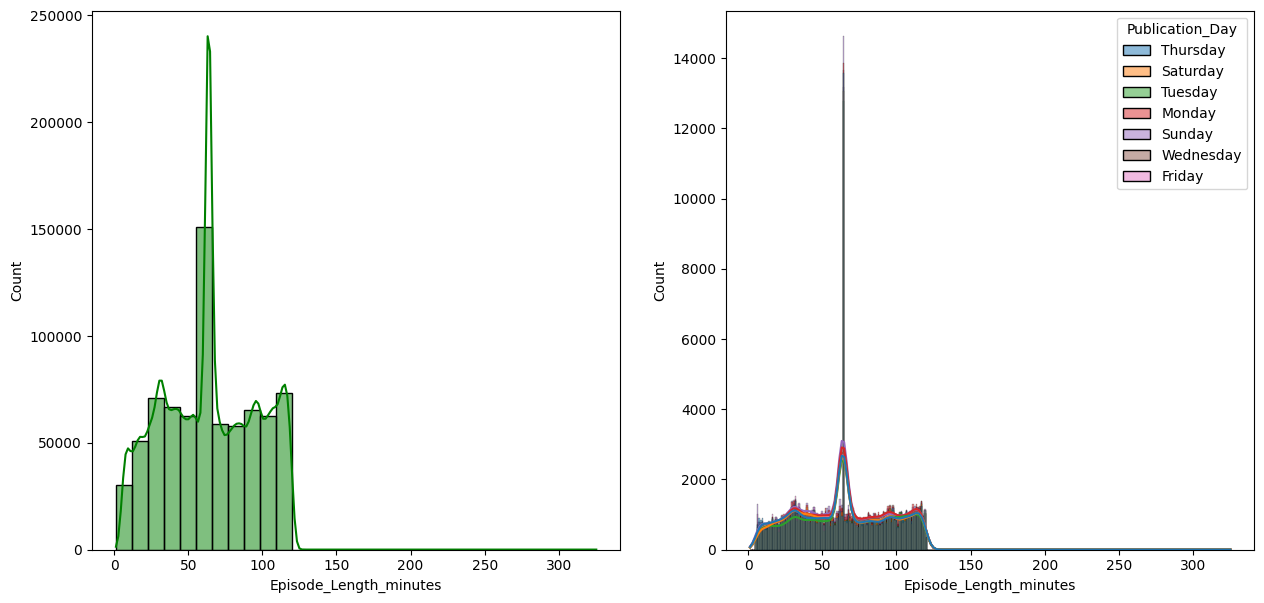

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=train_df,x='Episode_Length_minutes',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=train_df,x='Episode_Length_minutes',kde=True,hue='Publication_Day')
plt.show()

/tmp/ipykernel_442293/3390753388.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=filtered_df, x="Publication_Day", y="Episode_Length_minutes", palette="Set2")


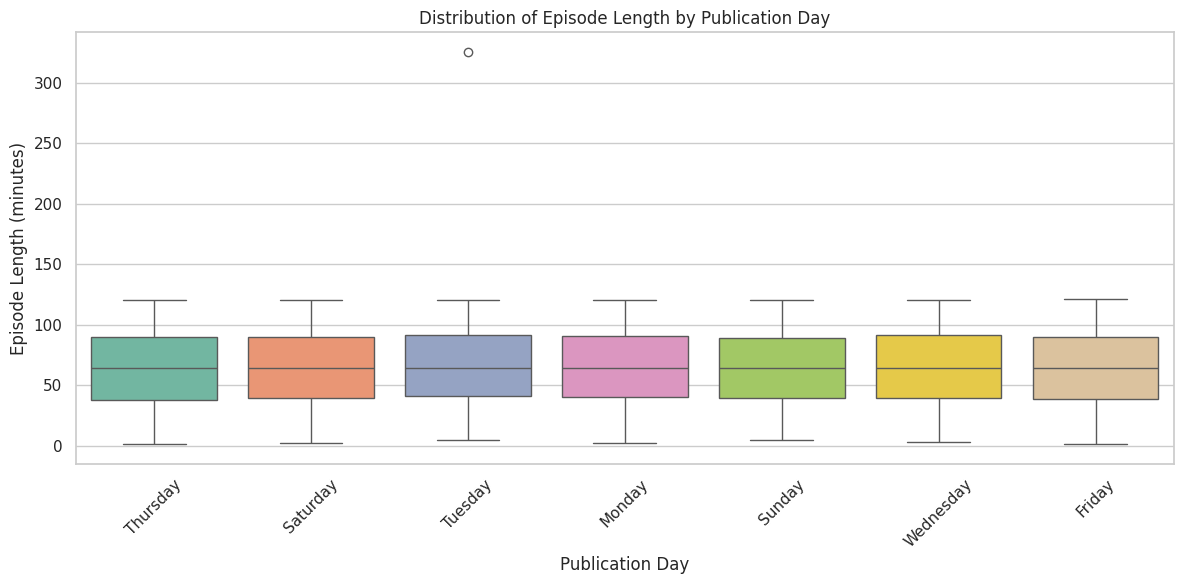

In [144]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a consistent visual style
sns.set(style="whitegrid")

# Drop rows with missing episode length for accurate plotting
filtered_df = train_df.dropna(subset=["Episode_Length_minutes"])

# Plot distribution of episode lengths for each publication day
plt.figure(figsize=(12, 6))
sns.boxplot(data=filtered_df, x="Publication_Day", y="Episode_Length_minutes", palette="Set2")
plt.title("Distribution of Episode Length by Publication Day")
plt.xlabel("Publication Day")
plt.ylabel("Episode Length (minutes)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## 📅 Episode Length by Publication Day — Insights
From the boxplot:

Median Length: Pretty consistent across all days (~60 minutes).

IQR (Interquartile Range): Most episodes fall between ~30 to ~90 minutes regardless of the day.

Outliers: Tuesday has a notable outlier with an episode over 320 minutes!

Variability: Slightly more variation on days like Monday and Saturday, but not dramatically different.

#### ✅ Conclusion: Episode lengths are fairly consistent across all days, with most episodes clustering between 30–90 minutes, and a strong central tendency around 60 minutes.

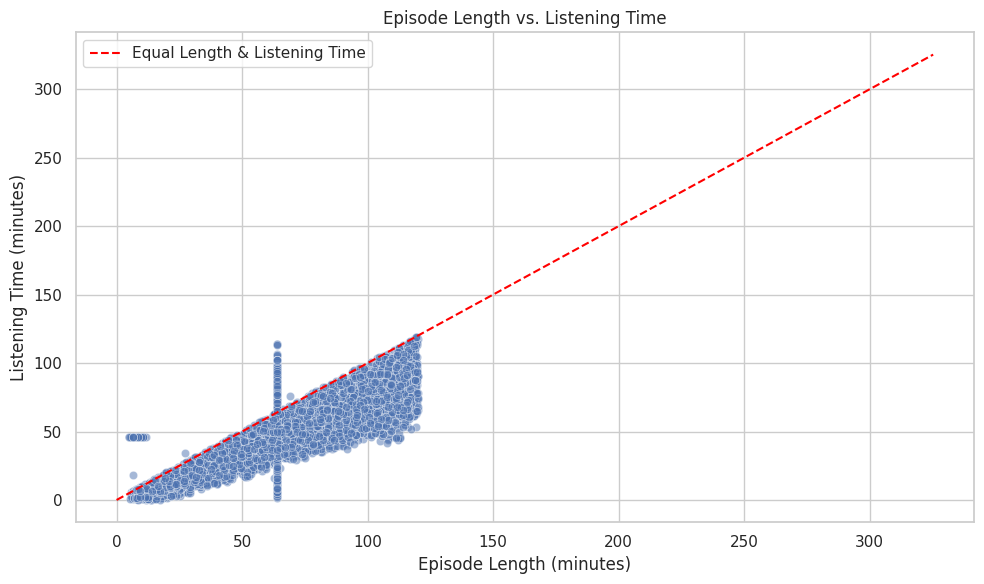

In [145]:
import numpy as np

# Drop rows with missing values in either Episode_Length or Listening_Time
engagement_df = train_df.dropna(subset=["Episode_Length_minutes", "Listening_Time_minutes"])

# Plot: Episode Length vs. Listening Time
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=engagement_df.sample(5000, random_state=42),  # sample for performance
    x="Episode_Length_minutes",
    y="Listening_Time_minutes",
    alpha=0.5
)
plt.plot(
    [0, engagement_df["Episode_Length_minutes"].max()],
    [0, engagement_df["Episode_Length_minutes"].max()],
    color="red",
    linestyle="--",
    label="Equal Length & Listening Time"
)
plt.title("Episode Length vs. Listening Time")
plt.xlabel("Episode Length (minutes)")
plt.ylabel("Listening Time (minutes)")
plt.legend()
plt.tight_layout()
plt.show()


## 🔁 Episode Length vs. Listening Time — Insights
This scatter plot gives us a cool peek at listener behavior:

The red dashed line represents where listening time equals episode length (i.e., full listen).

Most points fall below the red line, meaning:

People rarely listen to the full episode—they usually stop early.

There's a linear trend, especially up to ~100 minutes:

Longer episodes generally get longer listening times, but not proportionally.

Diminishing returns: Beyond ~100–120 minutes, listening time plateaus or even drops.

#### ✅ Conclusion: Listeners tend to engage more with shorter or moderately long episodes, and completion rate decreases as episodes get longer.

/tmp/ipykernel_442293/2462916054.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


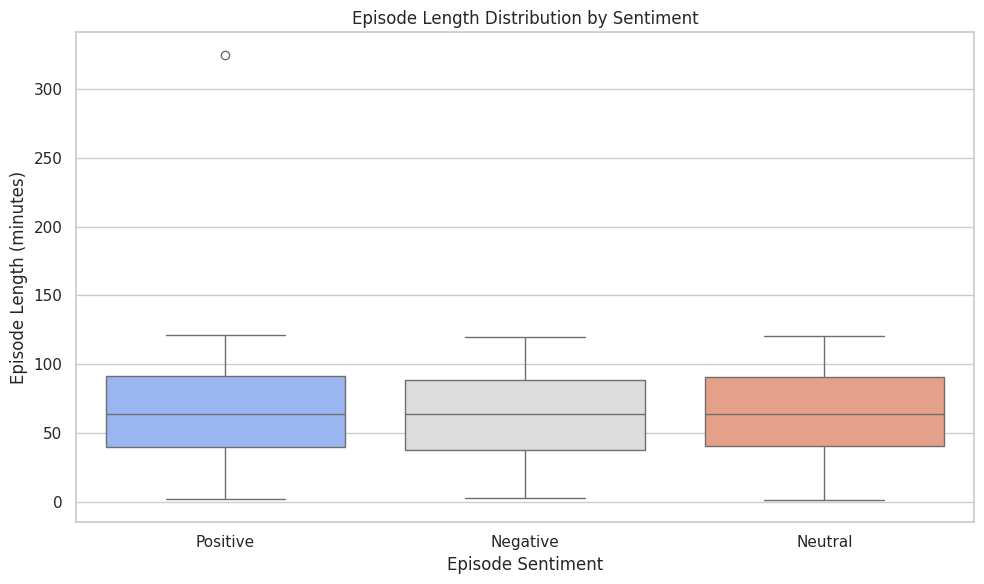

In [146]:
sentiment_df = train_df.dropna(subset=["Episode_Length_minutes"])
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=sentiment_df,
    x="Episode_Sentiment",
    y="Episode_Length_minutes",
    palette="coolwarm"
)
plt.title("Episode Length Distribution by Sentiment")
plt.xlabel("Episode Sentiment")
plt.ylabel("Episode Length (minutes)")
plt.tight_layout()
plt.show()


 #### There's an exceptionally long positive episode, the typical length and variability of episode lengths appear to be similar regardless of the overall sentiment expressed in the episode.

/tmp/ipykernel_442293/3196061696.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


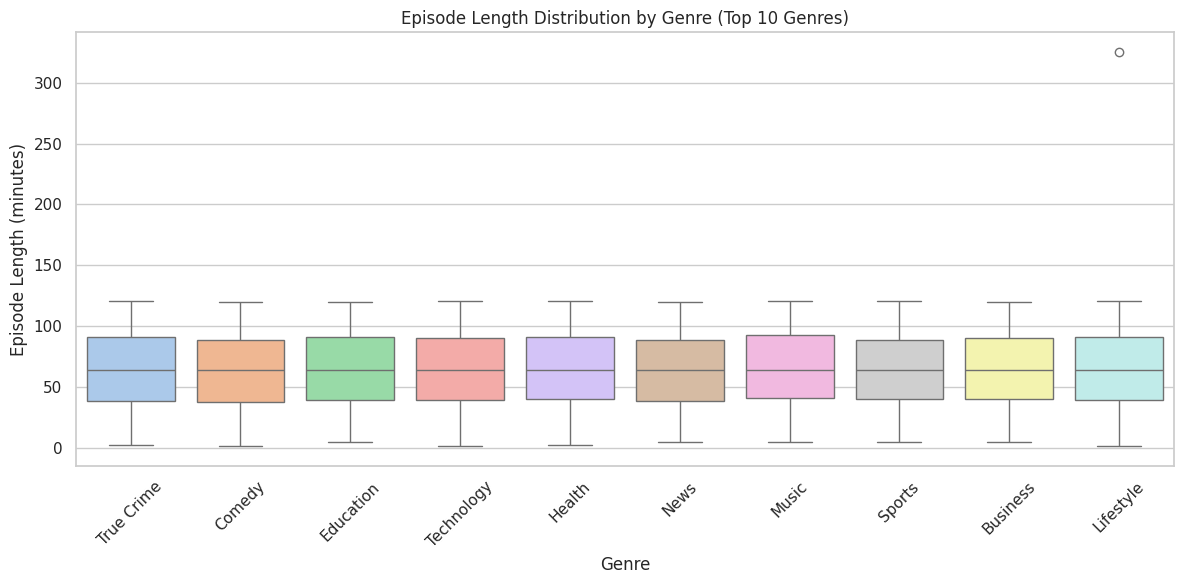

In [148]:
genre_df = train_df.dropna(subset=["Episode_Length_minutes", "Genre"])
top_genres = genre_df["Genre"].value_counts().nlargest(10).index
genre_df_filtered = genre_df[genre_df["Genre"].isin(top_genres)]
plt.figure(figsize=(12, 6))
sns.boxplot(
    data=genre_df_filtered,
    x="Genre",
    y="Episode_Length_minutes",
    palette="pastel"
)
plt.title("Episode Length Distribution by Genre (Top 10 Genres)")
plt.xlabel("Genre")
plt.ylabel("Episode Length (minutes)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


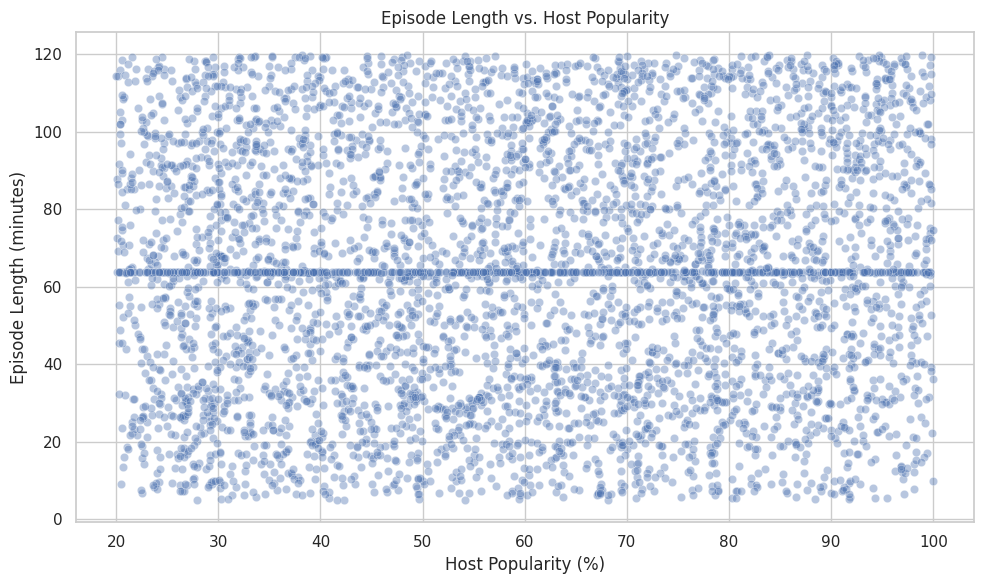

In [149]:
popularity_df = train_df.dropna(subset=["Episode_Length_minutes", "Host_Popularity_percentage", "Guest_Popularity_percentage"])
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=popularity_df.sample(5000, random_state=1),  # sample for readability
    x="Host_Popularity_percentage",
    y="Episode_Length_minutes",
    alpha=0.4
)
plt.title("Episode Length vs. Host Popularity")
plt.xlabel("Host Popularity (%)")
plt.ylabel("Episode Length (minutes)")
plt.tight_layout()
plt.show()


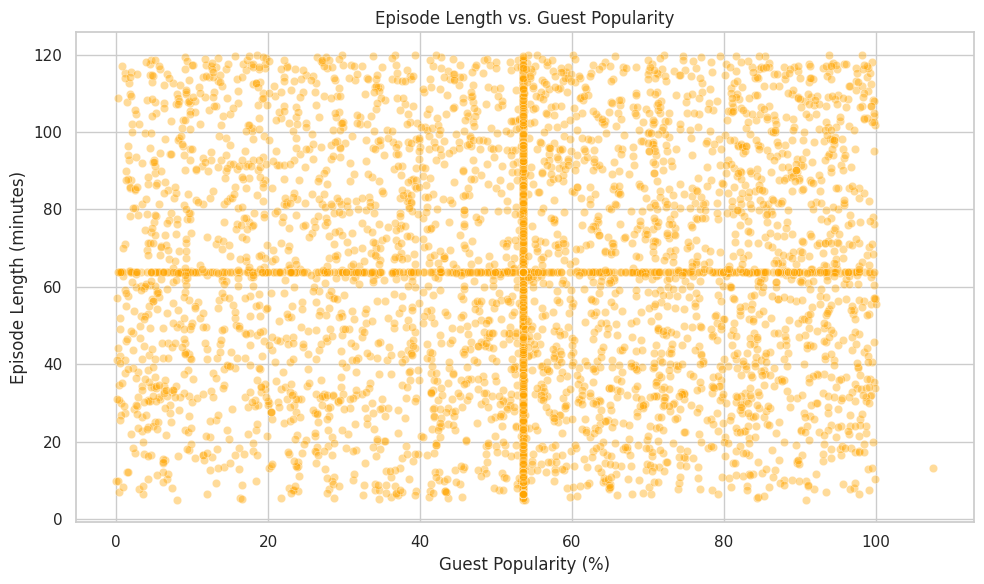

In [150]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=popularity_df.sample(5000, random_state=2),
    x="Guest_Popularity_percentage",
    y="Episode_Length_minutes",
    alpha=0.4,
    color="orange"
)
plt.title("Episode Length vs. Guest Popularity")
plt.xlabel("Guest Popularity (%)")
plt.ylabel("Episode Length (minutes)")
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Load datasets
train_df = pd.read_csv(r"/home/litzchill/vamshi/Podcast_listen_time/dataset/train.csv")
test_df = pd.read_csv(r"/home/litzchill/vamshi/Podcast_listen_time/dataset/test.csv")

# Drop high-cardinality or ID columns
drop_cols = ["id", "Podcast_Name", "Episode_Title"]
train_df = train_df.drop(columns=drop_cols)
test_ids = test_df["id"]  # Save for submission
test_df = test_df.drop(columns=drop_cols)

# Separate features and target
X_train = train_df.drop(columns=["Listening_Time_minutes"])
y_train = train_df["Listening_Time_minutes"]
X_test = test_df.copy()

# Identify numeric and categorical features
numerical_cols = X_train.select_dtypes(include=["int64", "float64"]).columns.tolist()
categorical_cols = X_train.select_dtypes(include=["object"]).columns.tolist()

# Preprocessing pipelines
numeric_transformer = SimpleImputer(strategy="mean")
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numerical_cols),
        ("cat", categorical_transformer, categorical_cols)
    ]
)

# Full pipeline
model_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1))
])

# Fit model
model_pipeline.fit(X_train, y_train)

# Predict on test set
predictions = model_pipeline.predict(X_test)

# Create submission file
submission = pd.DataFrame({
    "id": test_ids,
    "Listening_Time_minutes": predictions
})
submission.to_csv("submission.csv", index=False)
print("submission.csv file created successfully.")


/home/litzchill/vamshi/Podcast_listen_time/venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/home/litzchill/vamshi/Podcast_listen_time/venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/home/litzchill/vamshi/Podcast_listen_time/venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the fi

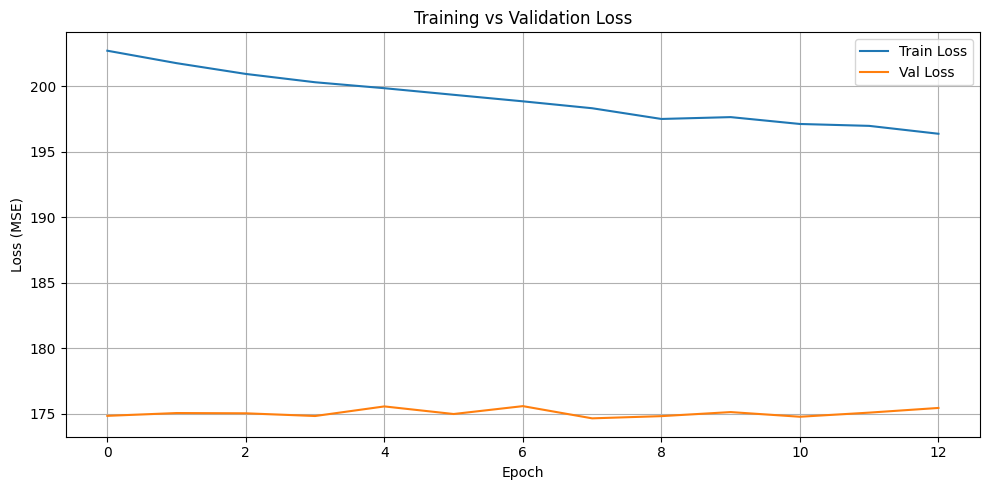

7813/7813 ━━━━━━━━━━━━━━━━━━━━ 4s 476us/step
✅ submission.csv saved with tuned ANN predictions.


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
from tensorflow.keras.callbacks import EarlyStopping
from keras_tuner.tuners import RandomSearch
from tqdm.keras import TqdmCallback
import keras_tuner as kt

# Load data
train_df = pd.read_csv(r"/home/litzchill/vamshi/Podcast_listen_time/dataset/train.csv")
test_df = pd.read_csv(r"/home/litzchill/vamshi/Podcast_listen_time/dataset/test.csv")
test_ids = test_df["id"]
drop_cols = ["id", "Podcast_Name", "Episode_Title"]
train_df.drop(columns=drop_cols, inplace=True)
test_df.drop(columns=drop_cols, inplace=True)

X = train_df.drop(columns=["Listening_Time_minutes"])
y = train_df["Listening_Time_minutes"]
X_test = test_df.copy()

# Preprocessing
num_cols = X.select_dtypes(include=["int64", "float64"]).columns.tolist()
cat_cols = X.select_dtypes(include=["object"]).columns.tolist()

numeric_transformer = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler())
])
categorical_transformer = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])
preprocessor = ColumnTransformer([
    ("num", numeric_transformer, num_cols),
    ("cat", categorical_transformer, cat_cols)
])

X_processed = preprocessor.fit_transform(X)
X_test_processed = preprocessor.transform(X_test)

X_train, X_val, y_train, y_val = train_test_split(X_processed, y, test_size=0.2, random_state=42)

# Model builder for Keras Tuner
def build_model(hp):
    model = Sequential()
    model.add(Dense(hp.Int('units_input', 64, 256, step=64), activation='relu', input_shape=(X_train.shape[1],)))
    model.add(Dropout(hp.Float('dropout1', 0.2, 0.5, step=0.1)))

    for i in range(hp.Int('num_layers', 1, 3)):
        model.add(Dense(hp.Int(f'units_{i}', 64, 256, step=64), activation='relu'))
        model.add(Dropout(hp.Float(f'dropout_{i}', 0.2, 0.5, step=0.1)))

    model.add(Dense(1))  # Output layer

    optimizer_choice = hp.Choice('optimizer', ['adam', 'rmsprop', 'sgd'])
    if optimizer_choice == 'adam':
        optimizer = Adam(learning_rate=hp.Float('lr', 1e-4, 1e-2, sampling='log'))
    elif optimizer_choice == 'rmsprop':
        optimizer = RMSprop(learning_rate=hp.Float('lr', 1e-4, 1e-2, sampling='log'))
    else:
        optimizer = SGD(learning_rate=hp.Float('lr', 1e-4, 1e-2, sampling='log'))

    model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])
    return model

# Hyperparameter tuner
tuner = RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=5,
    executions_per_trial=1,
    overwrite=True,
    directory='tuner_results',
    project_name='podcast_ann'
)

# Early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Search for best model
tuner.search(
    X_train, y_train,
    epochs=30,
    validation_data=(X_val, y_val),
    callbacks=[early_stop],
    verbose=0  # No tqdm here
)
best_model = tuner.get_best_models(num_models=1)[0]

history = best_model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=256,
    callbacks=[early_stop, TqdmCallback(verbose=1)],  # Safe to use here
    verbose=0
)

# Plot training history
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Training vs Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss (MSE)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Predict and save
test_preds = best_model.predict(X_test_processed).flatten()
submission = pd.DataFrame({
    "id": test_ids,
    "Listening_Time_minutes": test_preds
})
submission.to_csv("submission.csv", index=False)
print("✅ submission.csv saved with tuned ANN predictions.")


In [2]:
best_model.save("best_ann_model.h5")
print("✅ Model saved as best_ann_model.h5")

NameError: name 'best_model' is not defined